In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-dataset/lingSpam.csv
/kaggle/input/email-spam-dataset/enronSpamSubset.csv
/kaggle/input/email-spam-dataset/completeSpamAssassin.csv


In [8]:
EnronData = pd.read_csv("../input/email-spam-dataset/enronSpamSubset.csv")

In [9]:
EnronData = EnronData.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [13]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def Stemmer(words):
        stem_words = [stemmer.stem(o) for o in words]
        return " ".join(stem_words)    
    

def TextPreProcessing(Text):
    Text = str(Text)
    
    #lowercase string
    Text = Text.lower()
    
    #html tag stripping
    Text = str(Text)
    Text = re.sub('<[^<]+?>', '', Text)
    
    #url normalizing
    Text = re.sub(r'^https?:\/\/.*[\r\n]*', 'httpaddr', Text, flags=re.MULTILINE)
    
    #email normalizing
    Text = re.sub('\S*@\S*\s?', 'emailaddr', Text)
    
    #currency normalizing
    currencies = [['$',"€","£"], ['dollar', "euro", "pound"]]
    for i in range(len(currencies[0])):
        to_find = currencies[0][i]
        to_replace = currencies[1][i]
        Text = Text.replace(to_find, to_replace)
        
    #stemming
    Text = Stemmer(Text.split(" "))
    
        
    #special symbol removal
    Text = re.sub(r'[^a-zA-Z0-9 ]',r'',Text)
    
    #Remove all numbers
    Text = re.sub(r'[0-9]', '', Text)
    
    #remove banned words
    banned = ['hou',"ect","subject",'subj']
    for i in range(len(banned)):
        bannedwordfind = banned[i]
        Text = Text.replace(bannedwordfind, '')
    

    return Text

In [14]:
EnronData['Body'] = EnronData['Body'].apply(TextPreProcessing)

In [15]:
EnronData

,Body,Label
0,stock promo mover cwtd urgent investor tr...,1
1,are you list in major search engin submit yo...,1
2,import inform thu jun import inform thu...,1
3,utf q bask your life with utf q ...,1
4,bidstogo is place to go thing to do hello ...,1
...,...,...
9995,monday nd oct louis do you have half an r o...,0
9996,miss bloomberg deals stephani i believ i ve...,0
9997,eop salari survey questionnaire we will need ...,0
9998,q comparison hi louis i have a comparison f...,0


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
WordVectorizer = TfidfVectorizer()
X = WordVectorizer.fit_transform(EnronData['Body'])

In [17]:
X = X.toarray()

In [18]:
y = EnronData['Label']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

In [21]:
classifier.fit(X_train,y_train)

GaussianNB()

In [22]:
predicted_train = classifier.predict(X_train)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3378
           1       1.00      0.98      0.99      3322

    accuracy                           0.99      6700
   macro avg       0.99      0.99      0.99      6700
weighted avg       0.99      0.99      0.99      6700



In [24]:
y_pred = classifier.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1622
           1       0.94      0.91      0.93      1678

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



Model yields excellent results. With very low variance and low bias.

In [26]:
EnronData

,Body,Label
0,stock promo mover cwtd urgent investor tr...,1
1,are you list in major search engin submit yo...,1
2,import inform thu jun import inform thu...,1
3,utf q bask your life with utf q ...,1
4,bidstogo is place to go thing to do hello ...,1
...,...,...
9995,monday nd oct louis do you have half an r o...,0
9996,miss bloomberg deals stephani i believ i ve...,0
9997,eop salari survey questionnaire we will need ...,0
9998,q comparison hi louis i have a comparison f...,0


In [27]:
texts_ham = np.array(EnronData[EnronData.Label==0]['Body'])
texts_spam = np.array(EnronData[EnronData.Label==1]['Body'])

In [30]:
texts_ham[1]

' re  video confer with ross mcintyre nick  we may have problem get the vc locat in ston on short notic  we are current on stand  by  we shall default  if we have no other choic  to a phone interview  vince enron capit  trade resourc corp   europe from  nick mooney         am to  vinc j kaminski     emailaddr cc  mark tawney     emailaddr   video confer with ross mcintyre vinc  you sld have receiv an invit through lotu note which outlin the vc locat for the confer call tomorrow  it is schedul for    pm uk time     am ston time  ross  s background is from invest bank ex dresner bank  he ha a phd in mathemat and is current with speedwel weather deriv where he has been develop weather deriv price and portfolio optimis tools which they have been market to end  user with weather risk  the attach word document are articl that he ha written for public  regards nick mooney  mc  doc  analyt  doc  par  doc'

In [31]:
from wordcloud import WordCloud

In [33]:
hamWC = " ".join(body for body in texts_ham if body)
spamWC = " ".join(body for body in texts_spam if body)

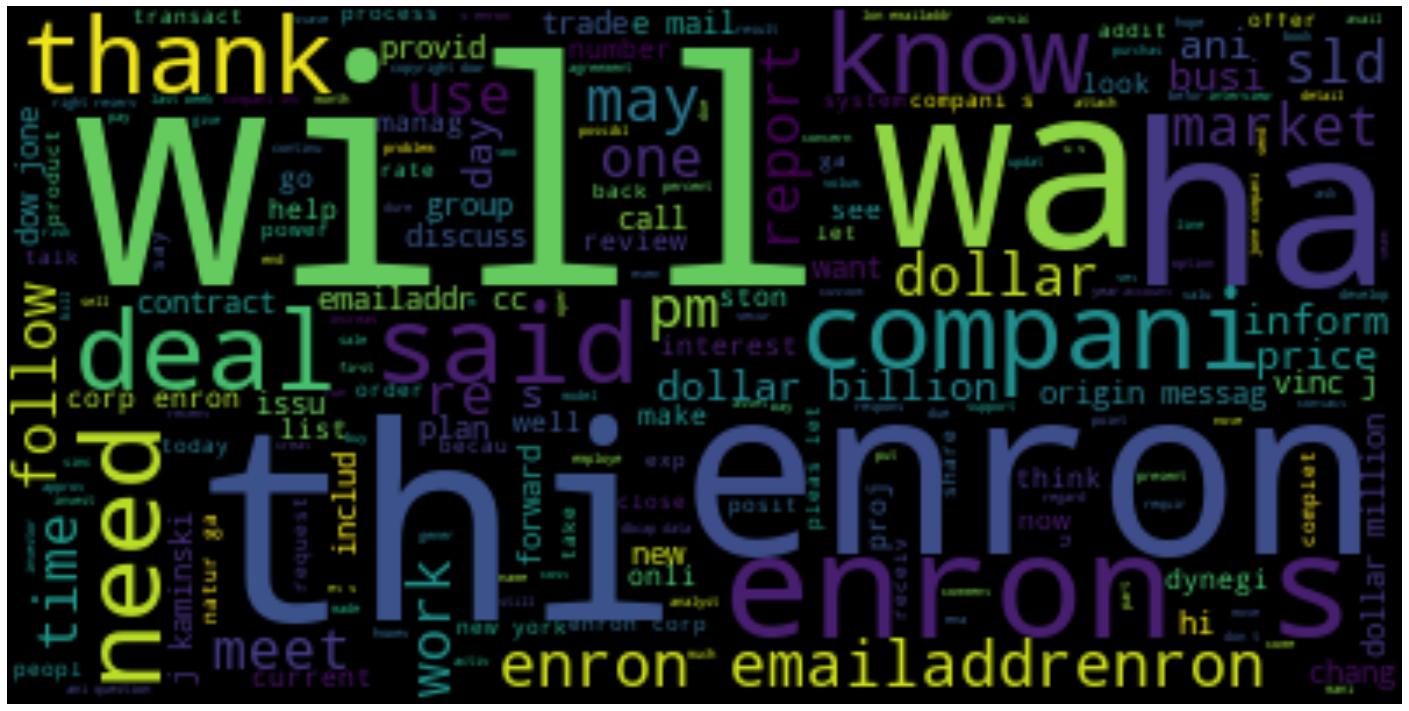

In [34]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(hamWC)

# Display the generated image:
plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

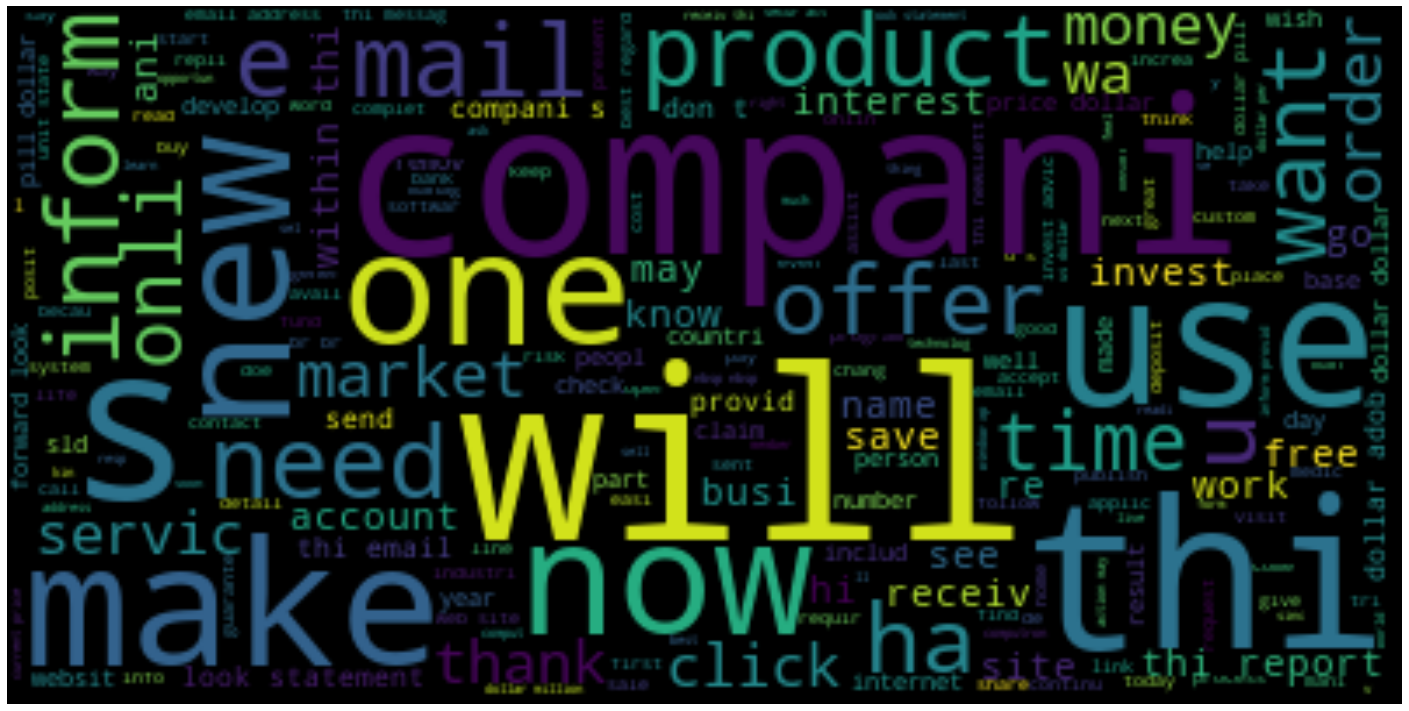

In [35]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(spamWC)

# Display the generated image:
plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()